In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [28]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(x, y ,index):
  plt.figure(figsize = (8,1))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

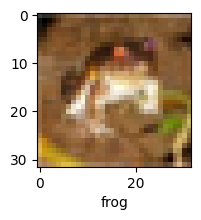

In [7]:
plot_sample(x_train, y_train, 0)

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
# ann = models. Sequential([
#     layers.Flatten(input_shape = (32,32,3)),
#     layers.Dense(3000,activation = "relu"),
#     layers.Dense(1000,activation = "relu"),
#     layers.Dense(10, activation = "sigmoid")
# ])

# ann.compile(optimizer = "sgd",
#             loss = "sparse_categorical_crossentropy",
#             metrics = ["accuracy"])

# ann.fit(x_train,y_train,epochs = 5)

In [10]:
cnn = models. Sequential([
    
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

cnn.compile(optimizer = "sgd",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 17s 4ms/step - loss: 1.9950 - accuracy: 0.2746
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6029 - accuracy: 0.4239
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4374 - accuracy: 0.4850
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3272 - accuracy: 0.5303
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2406 - accuracy: 0.5634
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1707 - accuracy: 0.5875
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1099 - accuracy: 0.6114
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0551 - accuracy: 0.6296
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0108 - accuracy: 0.6481
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.96

In [11]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0159 - accuracy: 0.6484


[1.0158742666244507, 0.6484000086784363]

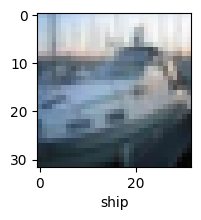

In [12]:
y_test = y_test.reshape(-1,)
plot_sample(x_test,y_test, 2)

In [19]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[8.8016707e-03, 5.1810243e-04, 5.4016445e-02, 5.1126003e-01,
        8.7342495e-03, 3.5373411e-01, 3.4115028e-02, 7.9245144e-04,
        2.7074525e-02, 9.5347658e-04],
       [8.9072123e-02, 5.5175382e-01, 2.2084183e-04, 1.7936842e-05,
        5.0301704e-05, 1.1523545e-06, 9.3221951e-07, 2.5175077e-05,
        3.3553925e-01, 2.3318520e-02],
       [8.1229202e-02, 1.5727185e-01, 3.0765040e-03, 3.0890799e-03,
        1.0990661e-03, 4.6044055e-04, 1.1821528e-04, 2.2735929e-03,
        6.4431244e-01, 1.0706960e-01],
       [7.0541596e-01, 2.0836178e-02, 9.9613834e-03, 8.3083083e-04,
        1.2353928e-02, 2.4027706e-05, 1.8651712e-04, 1.7732328e-04,
        2.4792416e-01, 2.2896698e-03],
       [5.3755713e-05, 2.6454870e-04, 1.9161168e-02, 4.7612257e-02,
        7.1899354e-01, 3.2417215e-02, 1.8089008e-01, 3.2317068e-04,
        1.9810325e-04, 8.6074819e-05]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred ]
y_classes[:5]

[3, 1, 8, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [25]:
classes[y_classes[0]]

'cat'

1/1 [==============================] - 0s 33ms/step


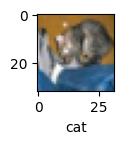

In [29]:
y_pred = cnn.predict(x_test[0].reshape(1,32,32,3))
y_pred
plot_sample(x_test,y_test, 0)